In [1]:
from pipeline import *
from utils import *

## 1. Read raw datacube and remove background & fringe

In [2]:
raw_datacube = read_raw_SITELLE_datacube("/home/qliu/data/A2390C4new.fits",name="A2390C")
raw_datacube.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2064                                                  
NAXIS3  =                  124                                                  
EXTEND  =                    T                                                  
DATE    = '2017-09-29'         / Creation date                                  
MASK    = 'False   '                                                            
FILETYPE= 'Calibrated Spectrum Cube' / Type of file                             
OBSERVAT= 'CFHT    '           / Observatory name                               
TELESCOP= 'CFHT 3.6m'          / Hawaii Big Island, Mauna Kea                   
INSTRUME= 'SITELLE '        

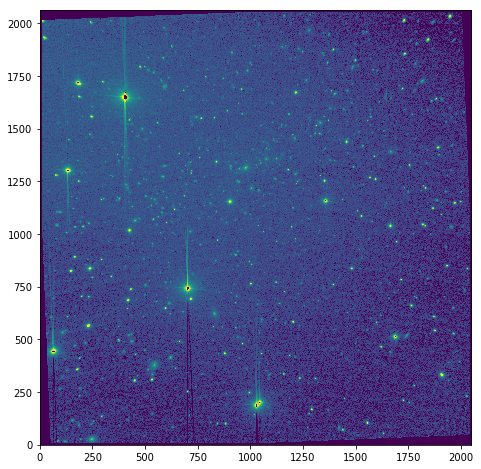

In [3]:
plt.figure(figsize=(8,8))
plt.imshow(raw_datacube.raw_stack_field, norm=norm1, origin="lower", vmin=6, vmax=100)

In [16]:
raw_datacube.save_mask_edge(save_path = './proc/')

In [4]:
raw_datacube.remove_background(box_size=128, save_path='./A2390C/fig/bkg/128/', plot=False)

Removing background... Channel: 10
Removing background... Channel: 20
Removing background... Channel: 30
Removing background... Channel: 40
Removing background... Channel: 50


In [6]:
raw_datacube.remove_fringe(channels=[1,2,3,4,5,51,52], save_path='./A2390C/fig/bkg/128/', plot=True)

Removing fringe... Channel: 1
Removing fringe... Channel: 2
Removing fringe... Channel: 3
Removing fringe... Channel: 4
Removing fringe... Channel: 5
Removing fringe... Channel: 51
Removing fringe... Channel: 52


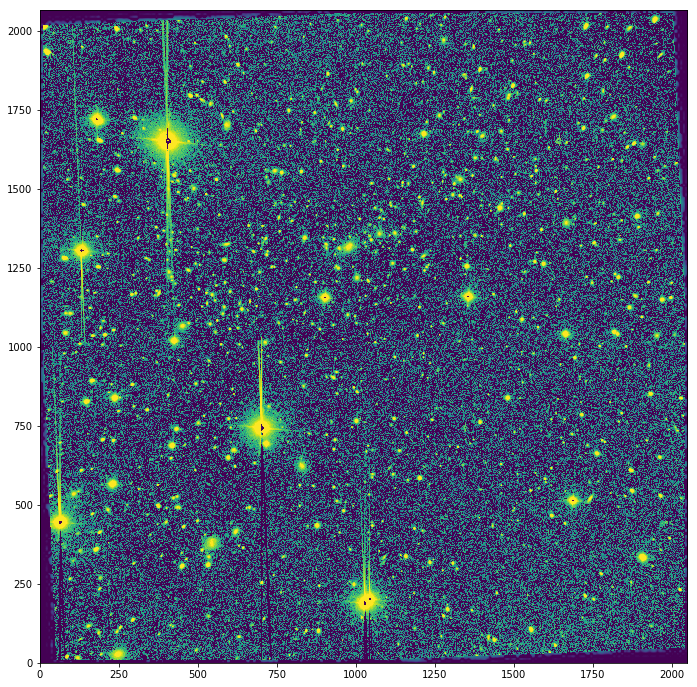

In [76]:
plt.figure(figsize=(12,12))
plt.imshow(raw_datacube.stack_field, norm=norm1, origin="lower", vmin=0, vmax=3)

In [ ]:
raw_datacube.save_weight_map(region_path="./A2390C/A2390C_mask.reg", weight=0.001, save_path = './proc/')

In [9]:
raw_datacube.save_fits(save_path = './proc/', suffix="")

Saving background & fringe subtracted datacube and stacked field...


## 2. Extract source and spectra from datacube 

In [2]:
datacube = Read_Datacube('./proc/A2390C_cube.fits', name='A2390C', mode="M2ISO")

In [3]:
image_m2, segm, segmap = datacube.m2iso_source_detection(sn_thre=2, nlevels=64, contrast=0.01, closing=True,
                                                         save=True, save_path = './proc/', suffix="")

Use the map of second maximum along wavelength to detect source.
Detecting and deblending source...


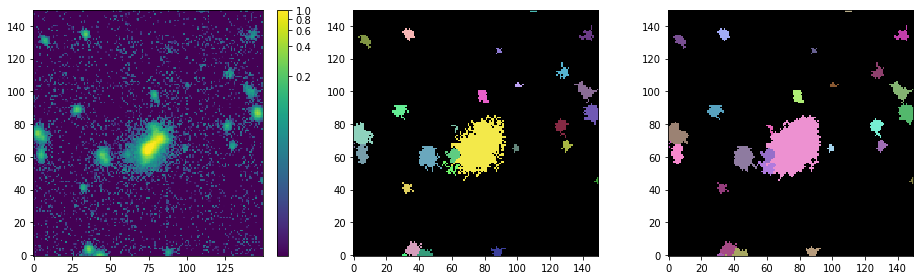

In [4]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(13,4))
im1 = ax1.imshow(image_m2[1250:1400,900:1050], norm=norm1, aspect="auto",origin="lower", vmin=0.05, vmax=1)
colorbar(im1)   
im2 = ax2.imshow(segm.data[1250:1400,900:1050], origin="lower", cmap=segm.make_cmap())
im3 = ax3.imshow(segmap[1250:1400,900:1050], origin="lower", cmap=segm.make_cmap()) 
plt.tight_layout()

In [5]:
datacube.m2iso_spec_extraction_all(segmap)

Extract spectra... 400/1842
Extract spectra... 800/1842
Extract spectra... 1200/1842
Extract spectra... 1600/1842


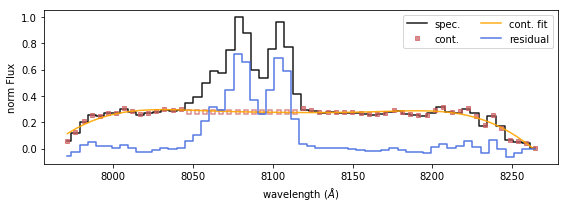

In [16]:
res, wavl_rebin, cont_fit = fit_continuum(datacube.obj_specs_opt[1758], datacube.wavl)

In [8]:
datacube.fit_continuum_all(model='GP', plot=True, save_path='./A2390C/fig_m2iso/fit_cont/')

Fit spectra continuum ... 200/1842
Fit spectra continuum ... 400/1842
Fit spectra continuum ... 600/1842
Fit spectra continuum ... 800/1842
Fit spectra continuum ... 1000/1842
Fit spectra continuum ... 1200/1842
Fit spectra continuum ... 1400/1842
Fit spectra continuum ... 1600/1842
Spurious detection #1605 ... Skip
Spurious detection #1606 ... Skip
Spurious detection #1607 ... Skip
Spurious detection #1608 ... Skip
Spurious detection #1610 ... Skip
Spurious detection #1611 ... Skip
Spurious detection #1612 ... Skip
Spurious detection #1614 ... Skip
Spurious detection #1615 ... Skip
Spurious detection #1617 ... Skip
Spurious detection #1618 ... Skip
Spurious detection #1619 ... Skip
Spurious detection #1620 ... Skip
Spurious detection #1622 ... Skip
Spurious detection #1623 ... Skip
Spurious detection #1624 ... Skip
Spurious detection #1625 ... Skip
Spurious detection #1626 ... Skip
Spurious detection #1627 ... Skip
Spurious detection #1628 ... Skip
Spurious detection #1629 ... Skip
Sp

In [13]:
datacube.save_spec_fits(save_path='./proc/', suffix="_all")

In [14]:
datacube.read_spec('./proc/A2390C-spec_all.fits')

### Comparison

In [15]:
hdu_spec = fits.open('./A2390C/A2390C-spec_v4.fits')
obj_nums = hdu_spec[0].data
obj_specs_opt = hdu_spec[3].data
wavl_rebin = hdu_spec[6].data

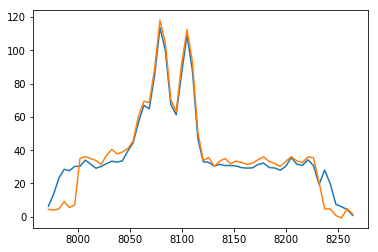

In [16]:
plt.plot(datacube.wavl, datacube.obj_specs_opt[1758])
plt.plot(datacube.wavl, obj_specs_opt[1935])

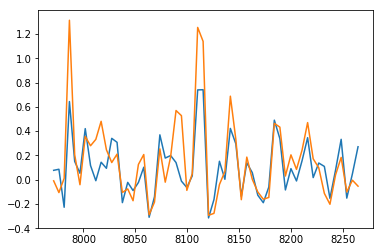

In [17]:
plt.plot(datacube.wavl, datacube.obj_specs_opt[1551])
plt.plot(datacube.wavl, obj_specs_opt[2207])

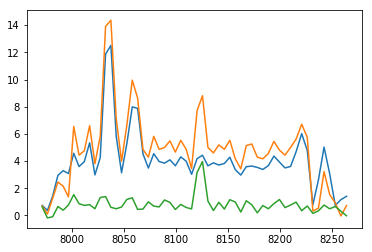

In [16]:
plt.plot(datacube.wavl, datacube.cube[:,segmap==1810].sum(axis=1))
plt.plot(datacube.wavl, obj_specs_opt[1659])
plt.plot(datacube.wavl, datacube.cube[:,segmap==1809].sum(axis=1))


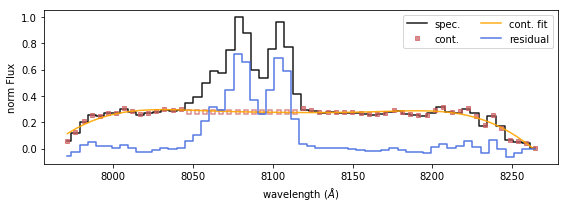

In [15]:
res, wavl_rebin, cont_fit = fit_continuum(datacube.obj_specs_opt[1758], datacube.wavl)

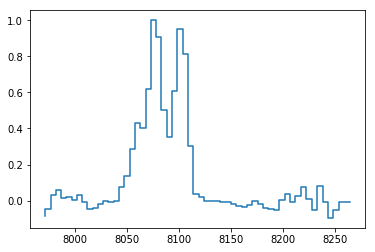

In [56]:
plt.step(wavl_rebin, res)